In [0]:

from __future__ import print_function, division
from builtins import range, input
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [0]:
class AdaBoost:
  def __init__(self, M):#here we initate the no of iterations we want the boosting algorithm to run
    self.M = M

  def fit(self, X, Y):
    self.models = []
    self.alphas = []
    N, _ = X.shape #here we get the shape of the data
    W = np.ones(N) / N #initialize the sample weights which will later be passed onto the fit fucntion
    

    for m in range(self.M): #this is the no of iterations we set 
      tree = DecisionTreeClassifier(max_depth=3)#here we create a tree with max_depth=3 using the skleran inbuilt function
      tree.fit(X, Y, sample_weight=W)
      P = tree.predict(X) #we predict the labels based on the data
      W= np.asarray(W) #Some error asking me to convert it to a array again

      err = W.dot(P != Y) #we calculate the error based on if the class is right or wrong
      alpha = 0.5*(np.log(1 - err) - np.log(err))

      W = W*np.exp(-alpha*Y*P) # we create a vectorized form of the W function
      W = W / W.sum() # We normalize the data here so that it sums to 1

      self.models.append(tree)
      self.alphas.append(alpha)

  def predict(self, X): #predict function is to predict the values of the boosted trees
    N, _ = X.shape
    W = np.ones(N) / N
    FX = np.zeros(N)
    
    for alpha, tree in zip(self.alphas, self.models):
      FX += alpha*tree.predict(X)
    return np.sign(FX), FX #we return the sign of the majortiy

  def score(self, X, Y):
    P, FX = self.predict(X)
    L = np.exp(-Y*FX).mean() #this is just a simple scoring function used to plot the errors on a graph
    return np.mean(P == Y), L





train error: 0.08893606982778957
test error: 0.10660377358490569


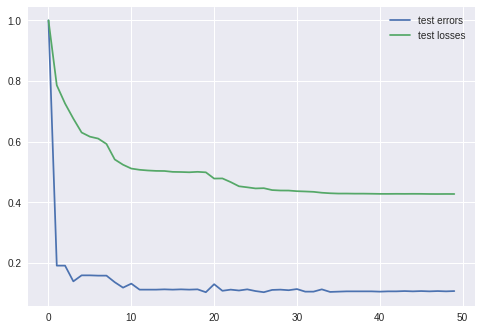

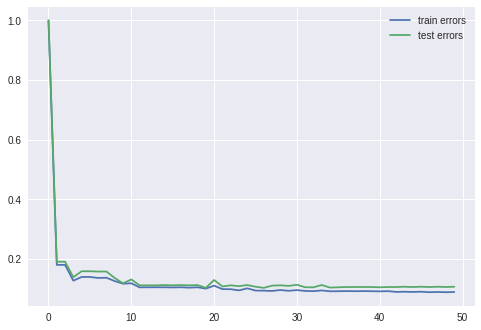

In [43]:
if __name__ == '__main__':
    
  data = pd.read_csv('banana_data.csv') #here we import the dataset from the banacsv
  data.columns= ['class','x_1','x_2'] #give names to the columns for better understanding
  X=data[['x_1','x_2']] #split the data
  Y=data['class']
  Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.20) #her we split into training and testing . Training is 80%, testing is 20%
 
  T = 50 #here we set the no of iterations
  train_errors = np.empty(T) #initalize arrays to store the errors for plotting
  test_losses = np.empty(T) #this is to store the test losses
  test_errors = np.empty(T)
  for num_trees in range(T): #here we start the for loop to loop over the iterations 
    

    model = AdaBoost(num_trees) #here we calll the adaboost class
    model.fit(Xtrain.values, Ytrain.values) #we pass just the values of the data to fit it
    acc, loss = model.score(Xtest.values, Ytest.values)
    acc_train, _ = model.score(Xtrain.values, Ytrain.values)
    train_errors[num_trees] = 1 - acc_train
    test_errors[num_trees] = 1 - acc
    test_losses[num_trees] = loss

    if num_trees == T - 1:
      print("train error:", 1 - acc_train)
      print("test error:", 1 - acc)

  plt.plot(test_errors, label='test errors')
  plt.plot(test_losses, label='test losses')
  plt.legend()
  plt.show()
  
  plt.plot(train_errors, label='train errors')
  plt.plot(test_errors, label='test errors')
  plt.legend()
  plt.show()